In [92]:
import pandas as pd
csv_file_path = 'Age_Vehicle_House.csv'
df = pd.read_csv(csv_file_path)
df.head()

,HOUSEID,PERSONID,R_AGE,R_SEX,EDUC,NUMADLT,VEHID,HHVEHCNT,VEHFUEL,VEHAGE,HOMEOWN,DRVRCNT,HHFAMINC,HHSIZE,URBANSIZE,URBRUR,WRKCOUNT,HOMETYPE,YOUNGCHILD
0,9000013002,2,42,1,7,2,2,2,1,3,1,2,11,4,4,1,1,1,0
1,9000013016,2,41,1,4,2,1,1,1,11,3,2,7,2,2,1,2,3,0
2,9000013039,1,38,1,6,2,1,1,1,7,3,2,7,4,4,1,1,3,0
3,9000013041,1,37,1,6,1,1,1,1,8,1,1,11,1,3,1,1,2,0
4,9000013042,1,59,1,8,2,1,2,1,5,1,2,11,3,4,1,2,1,1


## Data Cleaning Process

### Handling Missing Data:

#### Vehicle Fuel: 
We will remove entries with missing data in the 'Vehicle Fuel' column, which are marked as '97' (Unknown) and '-9' (Not available). This step ensures that the dataset includes only valid fuel type entries for analysis.

#### Fuel Category Reclassification: 
The fuel type will be simplified into two categories:
Category 0: Includes conventional fuels such as gas, diesel, and biodiesel.
Category 1: Includes alternative fuels such as hybrid and electric vehicles.
This categorization aids in simplifying the analysis, focusing on the comparison between traditional and alternative fuel vehicles.

#### Removing Irrelevant Data:

Education and Family Income: Entries where the education level is labeled as '-1' (Unknown) and family income is labeled as '-7' (Refuse to answer) or '-8' (Don't know) will be removed. This step is crucial to ensure the quality and reliability of the dataset, as these entries do not contribute valuable information for predictive modeling or statistical analysis.

In [93]:
# Adjust display settings
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # Adjust precision for floats
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)  # Adjust display width
pd.set_option('display.max_colwidth', None)  # Ensure full width of column content is shown

df_stats = df.drop(['HOUSEID', 'PERSONID', 'VEHID','HOMEOWN','HHFAMINC','URBANSIZE','URBRUR','HOMETYPE','EDUC'], axis=1)

# You might also want to convert some specific columns to integers if they are being shown as floats
# Convert columns to integers, if applicable and they are currently floats
integer_cols = [ 'R_AGE', 'R_SEX', 'NUMADLT', 'HHVEHCNT', 'DRVRCNT', 'HHSIZE', 'WRKCOUNT', 'YOUNGCHILD']
df_stats[integer_cols] = df_stats[integer_cols].astype(int)

# Let's print df to see the changes
display(df_stats.describe(include='all').T)

,count,mean,std,min,25%,50%,75%,max
R_AGE,7417.00,56.86,16.68,18.00,43.00,59.00,70.00,92.00
R_SEX,7417.00,1.32,1.00,-9.00,1.00,1.00,2.00,2.00
NUMADLT,7417.00,1.87,0.75,1.00,1.00,2.00,2.00,8.00
HHVEHCNT,7417.00,1.98,1.05,1.00,1.00,2.00,2.00,17.00
VEHFUEL,7417.00,1.36,2.79,-9.00,1.00,1.00,1.00,97.00
VEHAGE,7417.00,6.81,5.62,1.00,3.00,5.00,9.00,40.00
DRVRCNT,7417.00,1.79,0.74,0.00,1.00,2.00,2.00,7.00
HHSIZE,7417.00,2.31,1.28,1.00,1.00,2.00,3.00,10.00
WRKCOUNT,7417.00,1.02,0.91,0.00,0.00,1.00,2.00,6.00
YOUNGCHILD,7417.00,0.11,0.39,0.00,0.00,0.00,0.00,4.00


In [94]:
# Drop rows with VEHFUEL as 97 or -9
df_filtered = df[~df['VEHFUEL'].isin([97, -9])]

In [95]:
df_filtered.head()

,HOUSEID,PERSONID,R_AGE,R_SEX,EDUC,NUMADLT,VEHID,HHVEHCNT,VEHFUEL,VEHAGE,HOMEOWN,DRVRCNT,HHFAMINC,HHSIZE,URBANSIZE,URBRUR,WRKCOUNT,HOMETYPE,YOUNGCHILD
0,9000013002,2,42,1,7,2,2,2,1,3,1,2,11,4,4,1,1,1,0
1,9000013016,2,41,1,4,2,1,1,1,11,3,2,7,2,2,1,2,3,0
2,9000013039,1,38,1,6,2,1,1,1,7,3,2,7,4,4,1,1,3,0
3,9000013041,1,37,1,6,1,1,1,1,8,1,1,11,1,3,1,1,2,0
4,9000013042,1,59,1,8,2,1,2,1,5,1,2,11,3,4,1,2,1,1


In [96]:
# Define the function to reclassify VEHFUEL values
def reclassify_fuel_type(fuel_type):
    if fuel_type in [1, 2, 3]:
        return 0  # gas, diesel, biodiesel
    elif fuel_type in [4, 5, 6]:
        return 1  # hybrid and electric
    else:
        return fuel_type  # In case there are other unmentioned categories

# Apply the function to the VEHFUEL column
df_filtered['VEHFUEL'] = df_filtered['VEHFUEL'].apply(reclassify_fuel_type)

# Display the modified DataFrame to check the changes
display(df_filtered[['HOUSEID', 'VEHFUEL']])

C:\Users\Rahul\AppData\Local\Temp\ipykernel_16116\1069816643.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['VEHFUEL'] = df_filtered['VEHFUEL'].apply(reclassify_fuel_type)


,HOUSEID,VEHFUEL
0,9000013002,0
1,9000013016,0
2,9000013039,0
3,9000013041,0
4,9000013042,0
...,...,...
7412,9000218006,0
7413,9000218013,0
7414,9000218021,0
7415,9000218034,0


In [97]:
#Dropping rows with irrelevant education and family income details
df_filtered = df_filtered.loc[(df['EDUC'] != -1) & (df_filtered['HHFAMINC'] != -7) & (df_filtered['HHFAMINC'] != -8)]

# Display the DataFrame to ensure the rows are dropped
display(df_filtered.head())

,HOUSEID,PERSONID,R_AGE,R_SEX,EDUC,NUMADLT,VEHID,HHVEHCNT,VEHFUEL,VEHAGE,HOMEOWN,DRVRCNT,HHFAMINC,HHSIZE,URBANSIZE,URBRUR,WRKCOUNT,HOMETYPE,YOUNGCHILD
0,9000013002,2,42,1,7,2,2,2,0,3,1,2,11,4,4,1,1,1,0
1,9000013016,2,41,1,4,2,1,1,0,11,3,2,7,2,2,1,2,3,0
2,9000013039,1,38,1,6,2,1,1,0,7,3,2,7,4,4,1,1,3,0
3,9000013041,1,37,1,6,1,1,1,0,8,1,1,11,1,3,1,1,2,0
4,9000013042,1,59,1,8,2,1,2,0,5,1,2,11,3,4,1,2,1,1


## Feature Engineering Overview

### Age Group Classification:

#### Rationale: 
Understanding different age groups helps in analyzing behavior patterns specific to each demographic. By observing the distribution in our dataset, we have strategically divided respondents into four age groups:
* 18-42 (Adults): Captures the young adult to early middle-aged demographic.
* 43-59 (Middle-Aged): Encompasses individuals approaching or in middle age, potentially in peak career stages.
* 60-70 (Seniors): Includes those transitioning into retirement.
* 70+ (Elderly): Represents the senior citizen group, which may have different mobility and transportation needs.

These categorizations are crucial for tailoring services, marketing, and support according to age-related preferences and requirements.

### Vehicle Age Segmentation:

#### Rationale: 
Vehicle age is a key factor in vehicle performance, maintenance costs, and technological relevance.
Categories Defined:
* 0-3 years (New Vehicles): Includes the latest models with modern features and lower maintenance requirements.
* 3-5 years (Moderately New): Vehicles still relatively new, with possibly lower depreciation rates.
* 5-9 years (Old): Older vehicles that might require more frequent maintenance and might lack recent technological advancements.
* 9+ years (Very Old): Includes the oldest vehicles, which may be nearing the end of their service life or are considered less efficient and eco-friendly.

The segmentation of vehicle age allows for detailed insights into usage patterns, maintenance needs, and replacement cycles, facilitating better management decisions for vehicle fleets and individual owners.

In [98]:
vehicle_age_stats = df_filtered['VEHAGE'].describe()
respondent_age_stats = df_filtered['R_AGE'].describe()

print("Vehicle Age Statistics:\n", vehicle_age_stats)
print("\nRespondent Age Statistics:\n", respondent_age_stats)

Vehicle Age Statistics:
 count   7294.00
mean       6.82
std        5.62
min        1.00
25%        3.00
50%        5.00
75%        9.00
max       40.00
Name: VEHAGE, dtype: float64

Respondent Age Statistics:
 count   7294.00
mean      56.75
std       16.69
min       18.00
25%       43.00
50%       59.00
75%       70.00
max       92.00
Name: R_AGE, dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


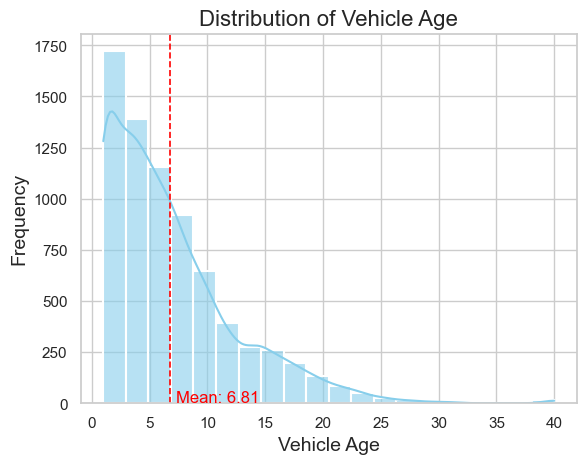

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


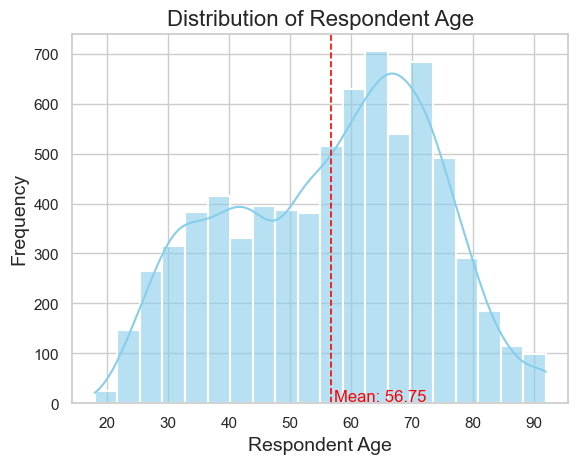

In [99]:
import seaborn as sns

sns.set(style="whitegrid") 

ax = sns.histplot(df_filtered['VEHAGE'], bins=20, kde=True, color="skyblue", alpha=0.6, linewidth=1.5)
ax.set_title('Distribution of Vehicle Age', fontsize=16)
ax.set_xlabel('Vehicle Age', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

# Adding a line for mean or median if needed
mean_val = df['VEHAGE'].mean()
plt.axvline(mean_val, color='red', linestyle='--', linewidth=1.2)
plt.text(mean_val+0.5, 5, f'Mean: {mean_val:.2f}', color = 'red')

plt.grid(True)
plt.show()

ax = sns.histplot(df_filtered['R_AGE'], bins=20, kde=True, color="skyblue", alpha=0.6, linewidth=1.5)
ax.set_title('Distribution of Respondent Age', fontsize=16)
ax.set_xlabel('Respondent Age', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

# Adding a line for mean or median if needed
mean_val = df_filtered['R_AGE'].mean()
plt.axvline(mean_val, color='red', linestyle='--', linewidth=1.2)
plt.text(mean_val+0.5, 5, f'Mean: {mean_val:.2f}', color = 'red')

plt.grid(True)
plt.show()

In [100]:

df_filtered['VEHAGE_CAT'] = pd.qcut(df_filtered['VEHAGE'], 4, labels=False)
df_filtered['R_AGE_CAT'] = pd.qcut(df_filtered['R_AGE'], 4, labels=False)
print(df_filtered[['VEHAGE', 'VEHAGE_CAT', 'R_AGE', 'R_AGE_CAT']])

      VEHAGE  VEHAGE_CAT  R_AGE  R_AGE_CAT
0          3           0     42          0
1         11           3     41          0
2          7           2     38          0
3          8           2     37          0
4          5           1     59          1
...      ...         ...    ...        ...
7412       5           1     43          0
7413       4           1     86          3
7414       6           2     74          3
7415       4           1     62          2
7416       2           0     58          1

[7294 rows x 4 columns]


In [101]:
vehage_distribution = df_filtered['VEHAGE_CAT'].value_counts().sort_index()
r_age_distribution = df_filtered['R_AGE_CAT'].value_counts().sort_index()

print("Vehicle Age Category Distribution:\n", vehage_distribution)
print("\nRespondent Age Category Distribution:\n", r_age_distribution)

Vehicle Age Category Distribution:
 VEHAGE_CAT
0    2452
1    1269
2    1806
3    1767
Name: count, dtype: int64

Respondent Age Category Distribution:
 R_AGE_CAT
0    1879
1    1831
2    1908
3    1676
Name: count, dtype: int64


In [102]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7294 entries, 0 to 7416
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   HOUSEID     7294 non-null   int64
 1   PERSONID    7294 non-null   int64
 2   R_AGE       7294 non-null   int64
 3   R_SEX       7294 non-null   int64
 4   EDUC        7294 non-null   int64
 5   NUMADLT     7294 non-null   int64
 6   VEHID       7294 non-null   int64
 7   HHVEHCNT    7294 non-null   int64
 8   VEHFUEL     7294 non-null   int64
 9   VEHAGE      7294 non-null   int64
 10  HOMEOWN     7294 non-null   int64
 11  DRVRCNT     7294 non-null   int64
 12  HHFAMINC    7294 non-null   int64
 13  HHSIZE      7294 non-null   int64
 14  URBANSIZE   7294 non-null   int64
 15  URBRUR      7294 non-null   int64
 16  WRKCOUNT    7294 non-null   int64
 17  HOMETYPE    7294 non-null   int64
 18  YOUNGCHILD  7294 non-null   int64
 19  VEHAGE_CAT  7294 non-null   int64
 20  R_AGE_CAT   7294 non-null   int64
d

In [103]:
# Apply quantile cut to R_AGE
r_age_result, r_age_quantile_bins = pd.qcut(df_filtered['R_AGE'], 4, labels=False, retbins=True)
df_filtered['R_AGE_CAT'] = r_age_result
print("Quantile bin edges for R_AGE:", r_age_quantile_bins)

# Apply quantile cut to VEHAGE
vehage_result, vehage_quantile_bins = pd.qcut(df_filtered['VEHAGE'], 4, labels=False, retbins=True)
df_filtered['VEHAGE_CAT'] = vehage_result
print("Quantile bin edges for VEHAGE:", vehage_quantile_bins)

Quantile bin edges for R_AGE: [18. 43. 59. 70. 92.]
Quantile bin edges for VEHAGE: [ 1.  3.  5.  9. 40.]


## Exploratory Data Analysis


In [104]:
counts = df_filtered['VEHFUEL'].value_counts()

# Print the counts
print(counts)

VEHFUEL
0    6795
1     499
Name: count, dtype: int64


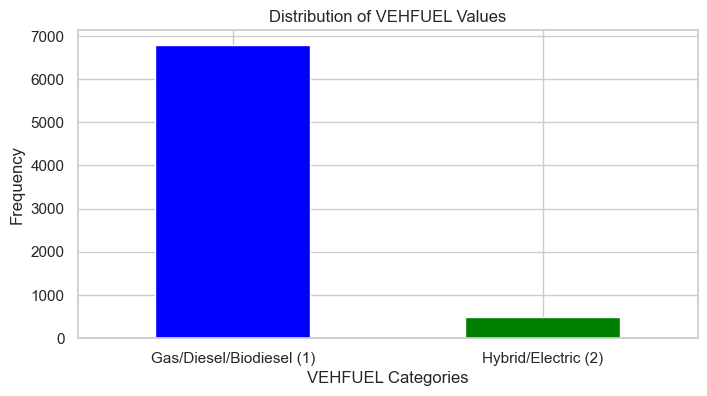

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
df_filtered['VEHFUEL'].value_counts().plot(kind='bar', color=['blue', 'green'])
plt.title('Distribution of VEHFUEL Values')
plt.xlabel('VEHFUEL Categories')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Gas/Diesel/Biodiesel (1)', 'Hybrid/Electric (2)'], rotation=0)
plt.show()

### Distribution of vehicle fuel

The graph provides a clear depiction of vehicle fuel preferences among respondents, highlighting a substantial prevalence of gasoline vehicles over hybrid or electric ones.

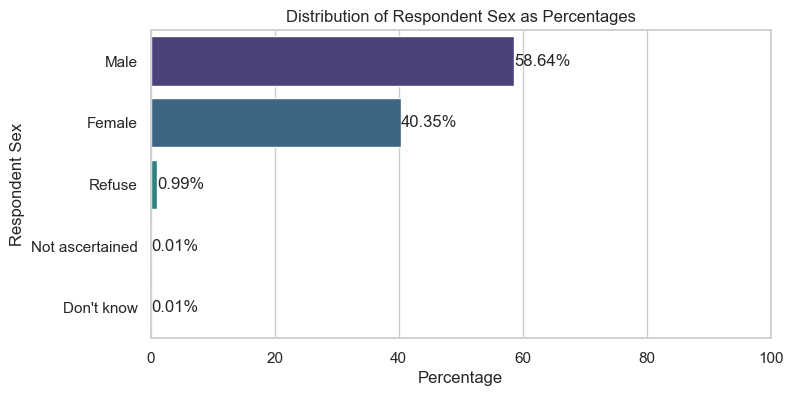

In [106]:
# Mapping integer codes to descriptive labels
sex_mapping = {
    1: "Male",
    2: "Female",
    -7: "Refuse",
    -8: "Don't know",
    -9: "Not ascertained"
}
df_filtered['R_SEX_Labels'] = df_filtered['R_SEX'].map(sex_mapping)

# Calculate the percentage for each category
sex_counts = df_filtered['R_SEX_Labels'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(8, 4))
sns.barplot(x=sex_counts.values, y=sex_counts.index, palette='viridis')

# Adding the percentage labels on the bars
for index, value in enumerate(sex_counts.values):
    plt.text(value, index, f'{value:.2f}%', va='center', ha='left')  # adjust the position based on your aesthetic preference

plt.xlabel('Percentage')
plt.ylabel('Respondent Sex')
plt.title('Distribution of Respondent Sex as Percentages')
plt.xlim(0, 100)  # Set x-axis limits to 0-100% for clarity

plt.show()

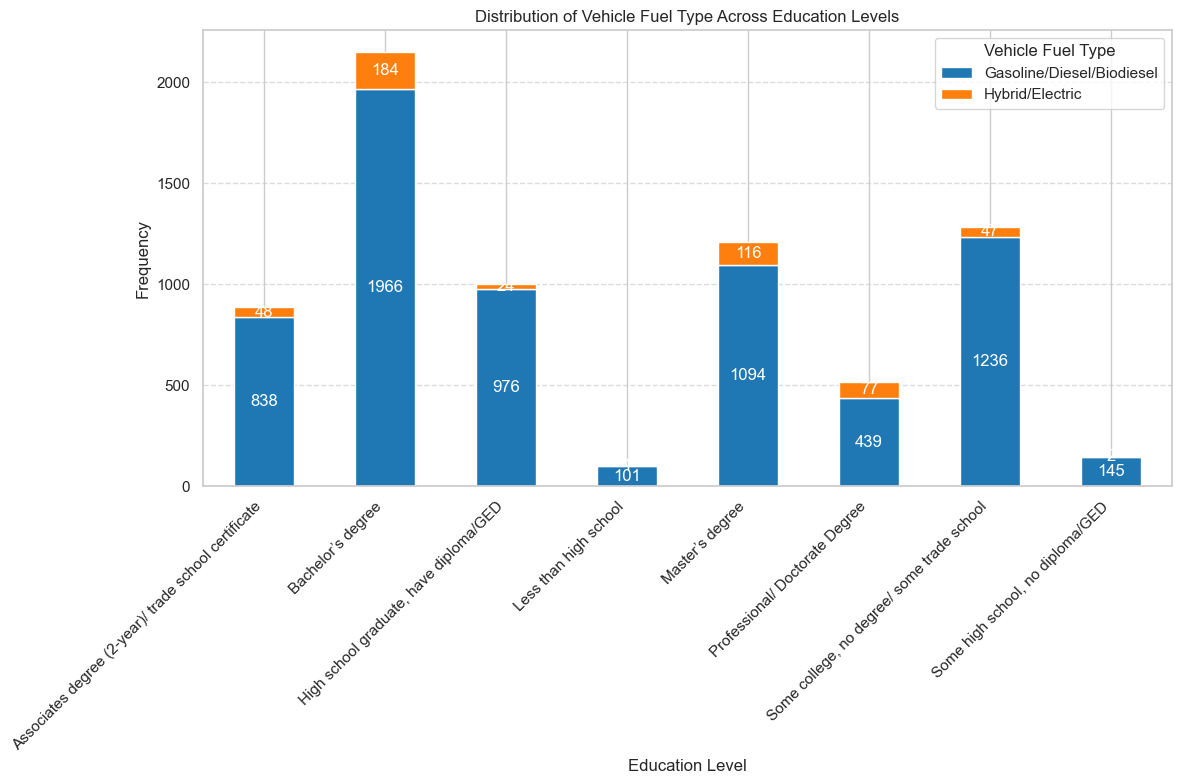

In [118]:
import seaborn as sns

education_map = {
    1: 'Less than high school',
    2: 'Some high school, no diploma/GED',
    3: 'High school graduate, have diploma/GED',
    4: 'Some college, no degree/ some trade school',
    5: 'Associates degree (2-year)/ trade school certificate',
    6: 'Bachelor’s degree',
    7: 'Master’s degree',
    8: 'Professional/ Doctorate Degree'
}
df_filtered['EDUC_CAT'] = df_filtered['EDUC'].map(education_map)

# Mapping VEHFUEL for readability
fuel_map = {0: 'Gasoline/Diesel/Biodiesel', 1: 'Hybrid/Electric'}
df_filtered['VEHFUEL_CAT'] = df_filtered['VEHFUEL'].map(fuel_map)

# Create a crosstab for plotting
ctab = pd.crosstab(df_filtered['EDUC_CAT'], df_filtered['VEHFUEL_CAT'])

# Plotting enhancements
plt.figure(figsize=(12, 8))
bar_plot = ctab.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=plt.gca())
plt.title('Distribution of Vehicle Fuel Type Across Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Vehicle Fuel Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding data labels
for rect in bar_plot.patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, rect.get_y() + height / 2.0, f'{int(height)}', ha='center', va='center', color='white')

plt.tight_layout()
plt.show()

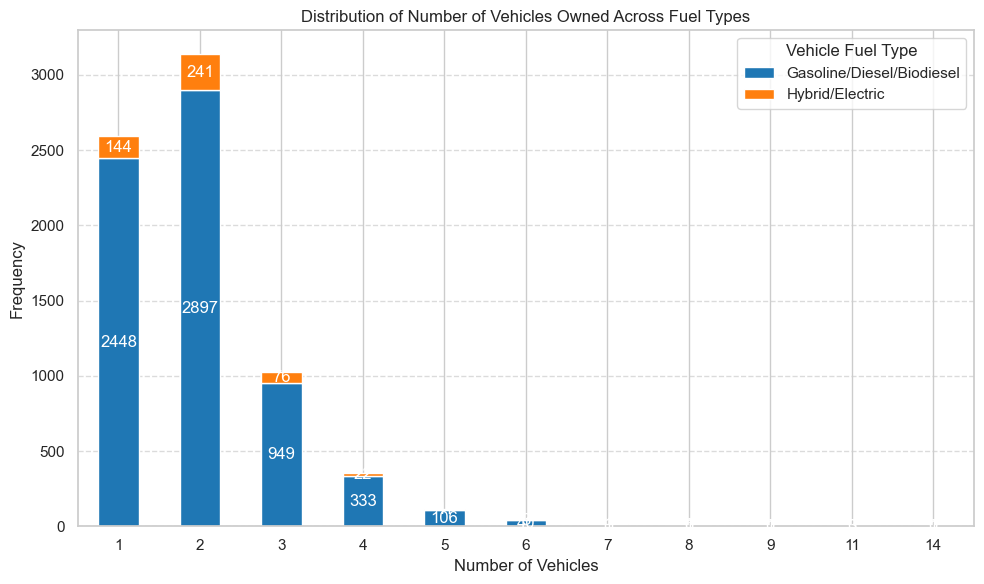

In [121]:
# Create a crosstab for plotting
ctab = pd.crosstab(df_filtered['HHVEHCNT'], df_filtered['VEHFUEL_CAT'])

# Plotting
plt.figure(figsize=(10, 6))
bar_plot = ctab.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=plt.gca())
plt.title('Distribution of Number of Vehicles Owned Across Fuel Types')
plt.xlabel('Number of Vehicles')
plt.ylabel('Frequency')
plt.xticks(rotation=0, ha='center')  # Adjust rotation and alignment as needed
plt.legend(title='Vehicle Fuel Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding data labels
for rect in bar_plot.patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, rect.get_y() + height / 2.0, f'{int(height)}', ha='center', va='center', color='white')

plt.tight_layout()
plt.show()

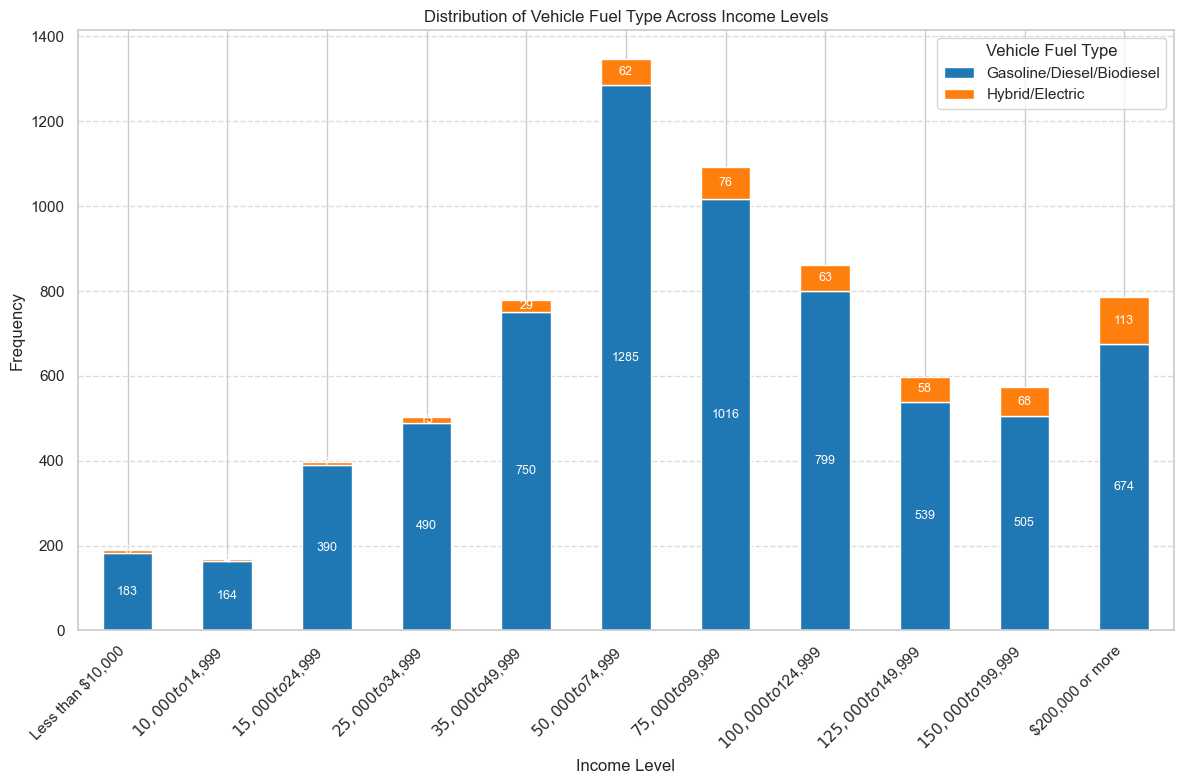

In [129]:

income_order = [
    'Less than $10,000', '$10,000 to $14,999', '$15,000 to $24,999',
    '$25,000 to $34,999', '$35,000 to $49,999', '$50,000 to $74,999',
    '$75,000 to $99,999', '$100,000 to $124,999', '$125,000 to $149,999',
    '$150,000 to $199,999', '$200,000 or more'
]

# Convert to categorical type with a defined order
df_filtered['INCOME_CAT'] = pd.Categorical(df_filtered['INCOME_CAT'], categories=income_order, ordered=True)

# Create a crosstab for plotting
ctab = pd.crosstab(df_filtered['INCOME_CAT'], df_filtered['VEHFUEL_CAT'])

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
ctab.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=ax)
plt.title('Distribution of Vehicle Fuel Type Across Income Levels')
plt.xlabel('Income Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
ax.set_xticklabels(income_order)  # Manually setting x-tick labels to ensure correct display
plt.legend(title='Vehicle Fuel Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding data labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width/2, y + height/2, '{:.0f}'.format(height), horizontalalignment='center', 
            verticalalignment='center', color='white', fontsize=9)

plt.tight_layout()
plt.show()


### Respondents Sex distribution

The above graph shows that most of the participants to the household survey is male which is 58.64% compared to female of 40.35%

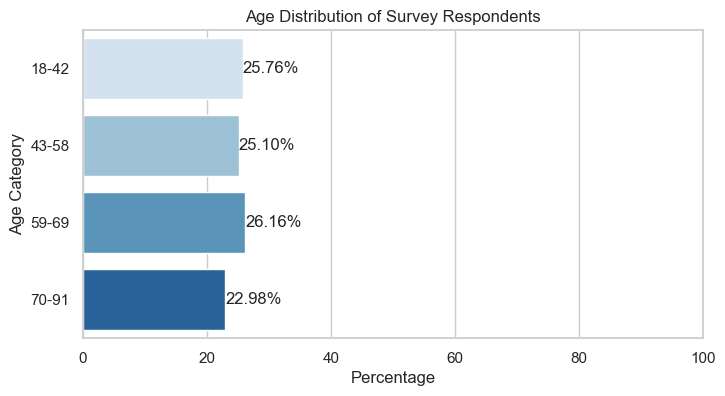

In [130]:
age_labels = ['18-42', '43-58', '59-69', '70-91'] 
df_filtered['R_AGE_LABELS'] = df_filtered['R_AGE_CAT'].map(dict(enumerate(age_labels)))

# Calculate the percentage for each category
age_cat_counts = df_filtered['R_AGE_LABELS'].value_counts(normalize=True).sort_index() * 100

# Plotting
plt.figure(figsize=(8, 4))
bar_plot = sns.barplot(x=age_cat_counts.values, y=age_cat_counts.index, palette='Blues')
plt.xlabel('Percentage')
plt.ylabel('Age Category')
plt.title('Age Distribution of Survey Respondents')

for index, value in enumerate(age_cat_counts.values):
    plt.text(value, index, f'{value:.2f}%', va='center')

plt.xlim(0, 100)  # Ensuring the x-axis starts at 0 and ends at 100 for percentage clarity
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


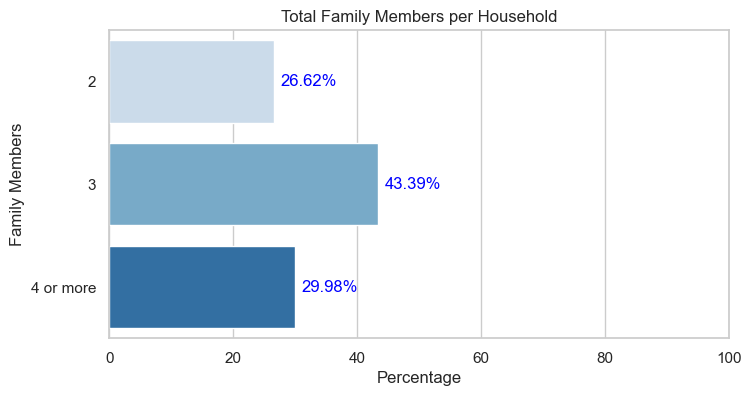

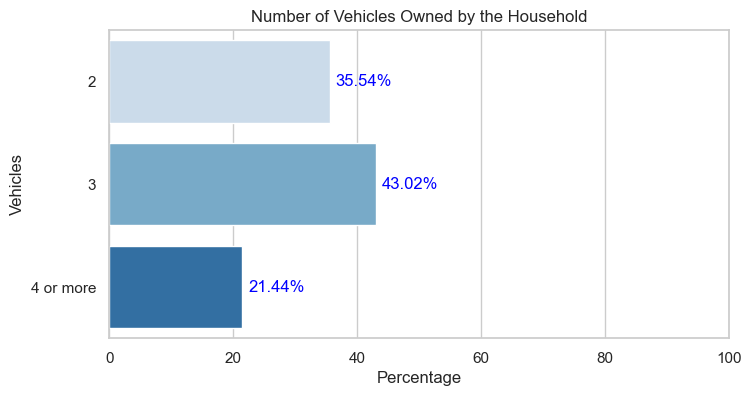

In [131]:
df_filtered['HHSIZE_CAT'] = pd.cut(df_filtered['HHSIZE'], bins=[0, 2, 3, float('inf')], right=False, labels=['2', '3', '4 or more'])
df_filtered['HHVEHCNT_CAT'] = pd.cut(df['HHVEHCNT'], bins=[0, 2, 3, float('inf')], right=False, labels=['2', '3', '4 or more'])

# Calculate the percentage for each category
hhsz_perc = df_filtered['HHSIZE_CAT'].value_counts(normalize=True).sort_index() * 100
hhvc_perc = df_filtered['HHVEHCNT_CAT'].value_counts(normalize=True).sort_index() * 100

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot for Total Family Members per Household
plt.figure(figsize=(8, 4))
sns.barplot(x=hhsz_perc.values, y=hhsz_perc.index, palette='Blues')
plt.title('Total Family Members per Household')
plt.xlabel('Percentage')
plt.ylabel('Family Members')
for i, v in enumerate(hhsz_perc):
    plt.text(v + 1, i, f"{v:.2f}%", color='blue', va='center')
plt.xlim(0, 100)

# Plot for Number of Vehicles Owned by the Household
plt.figure(figsize=(8, 4))
sns.barplot(x=hhvc_perc.values, y=hhvc_perc.index, palette='Blues')
plt.title('Number of Vehicles Owned by the Household')
plt.xlabel('Percentage')
plt.ylabel('Vehicles')
for i, v in enumerate(hhvc_perc):
    plt.text(v + 1, i, f"{v:.2f}%", color='blue', va='center')
plt.xlim(0, 100)

plt.show()


### Analysis of Household Composition and Vehicle Ownership

#### Total Family Members per Household
The first bar chart illustrates the distribution of total family members per household among the survey respondents:

- **2 Family Members**: Represent 26.62% of the respondents, indicating that a significant portion of households are smaller, likely comprising couples or single parents with one child.
- **3 Family Members**: Account for 43.39% of the respondents, making it the most common family size. This suggests that many households have two parents and one child or a single parent with two children.
- **4 or more Family Members**: Make up 29.98% of the respondents, showing a considerable portion of larger households, possibly including extended family members or multiple children.

This distribution highlights a diverse range of household sizes, with the majority being small to medium-sized families.

#### Number of Vehicles Owned by the Household
The second bar chart provides insights into the number of vehicles owned by the households:

- **2 Vehicles**: Constitute 35.54% of the respondents, suggesting that having a second vehicle is relatively common, possibly for commuting or convenience purposes.
- **3 Vehicles**: Are owned by 43.02% of the households, indicating that many households have more than two vehicles, which could be due to the presence of multiple driving-age members.
- **4 or more Vehicles**: Account for 21.44% of the respondents, showing that a smaller yet significant portion of households have a high number of vehicles, which might be linked to higher income levels or the need for different types of vehicles (e.g., cars, trucks, recreational vehicles).

**Key Insights:**
- The most common household size is 3 members, followed by larger households with 4 or more members.
- Vehicle ownership is skewed towards having multiple vehicles, with 3 vehicles being the most common, indicating a need for greater mobility and perhaps reflecting socioeconomic status.
- The alignment between the number of family members and vehicles suggests that as households grow, the need for additional vehicles increases.

These distributions are crucial for understanding the dynamics of household composition and vehicle ownership, which can inform transportation planning, policy-making, and market strategies.

In [132]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7294 entries, 0 to 7416
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   HOUSEID       7294 non-null   int64   
 1   PERSONID      7294 non-null   int64   
 2   R_AGE         7294 non-null   int64   
 3   R_SEX         7294 non-null   int64   
 4   EDUC          7294 non-null   int64   
 5   NUMADLT       7294 non-null   int64   
 6   VEHID         7294 non-null   int64   
 7   HHVEHCNT      7294 non-null   int64   
 8   VEHFUEL       7294 non-null   int64   
 9   VEHAGE        7294 non-null   int64   
 10  HOMEOWN       7294 non-null   int64   
 11  DRVRCNT       7294 non-null   int64   
 12  HHFAMINC      7294 non-null   int64   
 13  HHSIZE        7294 non-null   int64   
 14  URBANSIZE     7294 non-null   int64   
 15  URBRUR        7294 non-null   int64   
 16  WRKCOUNT      7294 non-null   int64   
 17  HOMETYPE      7294 non-null   int64   
 18  YOUNGCHILD   

### Modeling Approach

#### Multicollinearity Assessment
Initially, our modeling process involved examining multicollinearity among the predictors. We identified that the number of adults in a household exhibited a high Variance Inflation Factor (VIF) of 32.88, indicating significant multicollinearity. Given that the driver count feature encapsulates similar information, we chose to remove the number of adults from our models. After this adjustment, the remaining features displayed considerably lower VIF scores, suggesting that further removal of features would not substantively improve the model.

#### Addressing Data Imbalance
The dataset showed an imbalance in the distribution of the vehicle fuel type, with a predominance of gasoline vehicles over hybrid/electric ones. To tackle this, we applied Synthetic Minority Over-sampling Technique (SMOTE) to balance the classes effectively, enhancing the robustness of our subsequent models.

#### Model Selection
For the predictive analysis, we employed a diverse set of algorithms to evaluate their performance across the balanced dataset:

- **Logistic Regression**: A foundational technique suitable for binary classification tasks.
- **K-Nearest Neighbors (KNN)**: Useful for its simplicity and effectiveness in capturing non-linear relationships.
- **Random Forest and Decision Tree**: These ensemble methods are known for their high accuracy and ability to model complex interactions while also being interpretable.
- **AdaBoost**: Enhances the stability of the decision trees by combining multiple weak models to create a strong learner.
- **Naive Bayes**: Provides a fast, probabilistic approach, often effective in large datasets.
- **XGBoost**: An implementation of gradient boosted decision trees designed for speed and performance, which often delivers superior results.

Each model was carefully tuned and evaluated to ensure optimal performance. Our strategy was not only to achieve high accuracy but also to maintain a balance between sensitivity and specificity, ensuring that the model performs well across different metrics such as precision, recall, and the F1-score. This comprehensive approach enables us to select the best model based on empirical evidence and performance metrics.

In [133]:
df_modelling = df_filtered.drop(['HOUSEID', 'PERSONID', 'VEHID','R_AGE','VEHAGE','R_SEX_Labels','R_AGE_LABELS', 'HHSIZE_CAT','HHVEHCNT_CAT','EDUC_CAT','VEHFUEL_CAT','INCOME_CAT'], axis=1)

# Display the DataFrame to ensure the columns are dropped
display(df_modelling.head())

,R_SEX,EDUC,NUMADLT,HHVEHCNT,VEHFUEL,HOMEOWN,DRVRCNT,HHFAMINC,HHSIZE,URBANSIZE,URBRUR,WRKCOUNT,HOMETYPE,YOUNGCHILD,VEHAGE_CAT,R_AGE_CAT
0,1,7,2,2,0,1,2,11,4,4,1,1,1,0,0,0
1,1,4,2,1,0,3,2,7,2,2,1,2,3,0,3,0
2,1,6,2,1,0,3,2,7,4,4,1,1,3,0,2,0
3,1,6,1,1,0,1,1,11,1,3,1,1,2,0,2,0
4,1,8,2,2,0,1,2,11,3,4,1,2,1,1,1,1


## VIF
Performing VIF for checking multicollinearity

In [134]:
import numpy as np

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF for each feature
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data


numeric_cols = df_modelling.select_dtypes(include=[np.number]).drop(['VEHFUEL'], axis=1)  # Exclude target variable

# Calculate VIF
vif_df = calculate_vif(numeric_cols)
print(vif_df)

      Variable   VIF
0        R_SEX  2.76
1         EDUC 12.08
2      NUMADLT 32.89
3     HHVEHCNT  7.70
4      HOMEOWN  6.61
5      DRVRCNT 31.92
6     HHFAMINC 12.91
7       HHSIZE 13.28
8    URBANSIZE 10.44
9       URBRUR 13.53
10    WRKCOUNT  4.48
11    HOMETYPE  5.08
12  YOUNGCHILD  1.54
13  VEHAGE_CAT  2.62
14   R_AGE_CAT  4.27


### Dropping NUMADLT column due to high VIF also DRVRCNT column and NUMADLT are correlated

In [135]:
#df_modelling= df_modelling.drop(['NUMADLT'], axis=1)
numeric_cols = df_modelling.select_dtypes(include=[np.number]).drop(['VEHFUEL'], axis=1)
vif_df = calculate_vif(numeric_cols)
display(vif_df)                                                            

,Variable,VIF
0,R_SEX,2.76
1,EDUC,12.08
2,NUMADLT,32.89
3,HHVEHCNT,7.70
4,HOMEOWN,6.61
5,DRVRCNT,31.92
6,HHFAMINC,12.91
7,HHSIZE,13.28
8,URBANSIZE,10.44
9,URBRUR,13.53


In [136]:
df_modelling.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7294 entries, 0 to 7416
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   R_SEX       7294 non-null   int64
 1   EDUC        7294 non-null   int64
 2   NUMADLT     7294 non-null   int64
 3   HHVEHCNT    7294 non-null   int64
 4   VEHFUEL     7294 non-null   int64
 5   HOMEOWN     7294 non-null   int64
 6   DRVRCNT     7294 non-null   int64
 7   HHFAMINC    7294 non-null   int64
 8   HHSIZE      7294 non-null   int64
 9   URBANSIZE   7294 non-null   int64
 10  URBRUR      7294 non-null   int64
 11  WRKCOUNT    7294 non-null   int64
 12  HOMETYPE    7294 non-null   int64
 13  YOUNGCHILD  7294 non-null   int64
 14  VEHAGE_CAT  7294 non-null   int64
 15  R_AGE_CAT   7294 non-null   int64
dtypes: int64(16)
memory usage: 968.7 KB


In [137]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming df is your DataFrame and 'VEHFUEL' is the target variable
X = df_modelling.drop('VEHFUEL', axis=1)
y = df_modelling['VEHFUEL']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#### Dataset after oversampling

In [138]:
X_train_smote.shape

(10866, 15)

In [139]:
import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Define the models to train
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000), True),
    ("K-Nearest Neighbors", KNeighborsClassifier(), True),
    ("Random Forest", RandomForestClassifier(), False),
    ("Decision Tree", DecisionTreeClassifier(), False),
    ("AdaBoost", AdaBoostClassifier(), False),
    ("Naive Bayes", GaussianNB(), True),
    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), False)
]

results_list = []
fitted_models = {}


# Checking if any model requires scaling
if any(model[2] for model in models):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_smote)
    X_test_scaled = scaler.transform(X_test)
else:
    X_train_scaled, X_test_scaled = X_train_smote, X_test

# Training and evaluating models
for name, model, needs_scaling in models:
    start_time = time.time()
    
    # Fitting the model
    model.fit(X_train_scaled if needs_scaling else X_train_smote, y_train_smote)
    
    # Storing the fitted model
    fitted_models[name] = model
    
    # Making predictions
    y_pred_train = model.predict(X_train_scaled if needs_scaling else X_train_smote)
    y_pred_test = model.predict(X_test_scaled if needs_scaling else X_test)
    
    # Evaluating performance
    train_accuracy = accuracy_score(y_train_smote, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_test, average='weighted')
    time_taken = time.time() - start_time
    
    # Appending results to the list
    results_list.append({
        "Model": name,
        "Accuracy_Train": train_accuracy,
        "Accuracy_Test": test_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1_Score": f1,
        "Time_Taken": time_taken
    })

# Creating a DataFrame to display results
results_df = pd.DataFrame(results_list)
print(results_df)

                 Model  Accuracy_Train  Accuracy_Test  Precision  Recall  F1_Score  Time_Taken
0  Logistic Regression            0.71           0.66       0.90    0.66      0.75        0.10
1  K-Nearest Neighbors            0.89           0.70       0.89    0.70      0.77        6.22
2        Random Forest            0.99           0.86       0.89    0.86      0.87        3.03
3        Decision Tree            0.99           0.80       0.89    0.80      0.84        0.10
4             AdaBoost            0.76           0.69       0.89    0.69      0.76        0.97
5          Naive Bayes            0.68           0.59       0.89    0.59      0.69        0.03
6              XGBoost            0.94           0.81       0.89    0.81      0.84        0.56


In [140]:
display(results_df)

,Model,Accuracy_Train,Accuracy_Test,Precision,Recall,F1_Score,Time_Taken
0,Logistic Regression,0.71,0.66,0.90,0.66,0.75,0.10
1,K-Nearest Neighbors,0.89,0.70,0.89,0.70,0.77,6.22
2,Random Forest,0.99,0.86,0.89,0.86,0.87,3.03
3,Decision Tree,0.99,0.80,0.89,0.80,0.84,0.10
4,AdaBoost,0.76,0.69,0.89,0.69,0.76,0.97
5,Naive Bayes,0.68,0.59,0.89,0.59,0.69,0.03
6,XGBoost,0.94,0.81,0.89,0.81,0.84,0.56


### Model Evaluation Summary

* Random Forest and XGBoost are the standout models, offering a robust combination of accuracy, precision, and efficiency.
* For further evaluating the model we will be performing hyperpameter tuning with grid search for both XGBoost and Random Forest.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


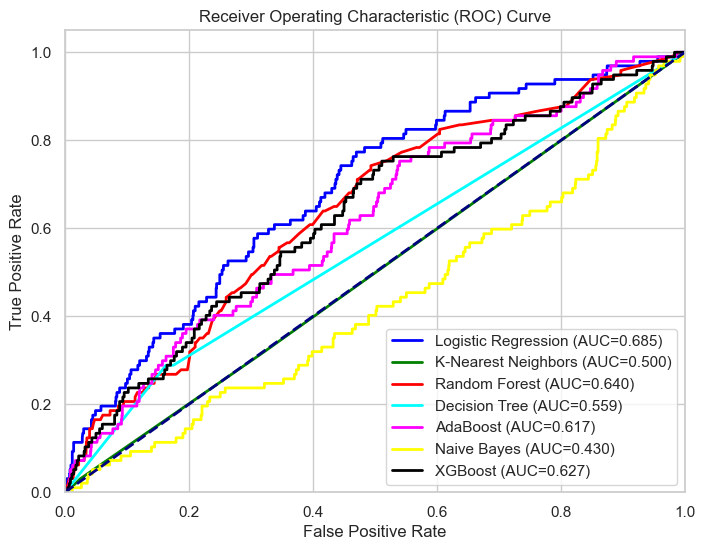

In [141]:
from sklearn.metrics import roc_curve, auc


plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
for (model_name, model), color in zip(fitted_models.items(), colors):

    X_input = X_test_scaled if 'scaled' in model_name.lower() else X_test

    y_prob = model.predict_proba(X_input)[:, 1]

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{model_name} (AUC={roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## Hyper Parameter Tuning

In [142]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Hyper-parameter Tuning and Evaluation Function with Time Measurement
def tune_and_evaluate(model, param_grid, X_train, y_train, X_test, y_test, n_iter=10, cv=5):
    start_time = time.time()
    
    # Performing RandomizedSearchCV
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=n_iter, cv=cv, verbose=2, random_state=0, n_jobs=-1)
    random_search.fit(X_train, y_train)
    
    end_time = time.time()
    
    # Our Best Model
    best_model = random_search.best_estimator_
    
    # Predictions
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)
    
    # Evaluation
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_test, average='weighted')
    
    # Compilation of Results
    results = {
        'Model': best_model.__class__.__name__,
        'Best Parameters': random_search.best_params_,
        'Accuracy Train': train_accuracy,
        'Accuracy Test': test_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Time Taken (s)': end_time - start_time
    }
    return results, best_model

# Parameters for rf and xgb
rf_params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [0.5, 1, 1.5]
}

xgb_params = {
    'n_estimators': [500, 1000, 1500],
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [5, 7, 9],
    'colsample_bytree': [0.7, 1, 1.3],
    'subsample': [0.6, 0.8, 1]
}

# Assuming X_train_smote, y_train_smote, X_test, y_test are defined

# Tuning XGBoost and capturing both results and the best model
xgb_tuning_results, xgb_best_model = tune_and_evaluate(
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    xgb_params,
    X_train_smote,
    y_train_smote,
    X_test,
    y_test
)

# Tuning Random Forest and capturing both results and the best model
rf_tuning_results, rf_best_model = tune_and_evaluate(
    RandomForestClassifier(),
    rf_params,
    X_train_smote,
    y_train_smote,
    X_test,
    y_test
)

# Preparing the results for display
results_data = [xgb_tuning_results, rf_tuning_results]
results_df = pd.DataFrame(results_data)

# Displaying the tuning results
print(results_df)

# To check the full parameters
pd.set_option('display.max_colwidth', None)
display(results_df[['Model', 'Best Parameters']])


Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rahul\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Rahul\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1519, in fit
    self._Booster = train(
               

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-package

                    Model                                                                                       Best Parameters  Accuracy Train  Accuracy Test  Precision  Recall  F1 Score  Time Taken (s)
0           XGBClassifier  {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 9, 'learning_rate': 0.3, 'colsample_bytree': 1}            0.99           0.85       0.89    0.85      0.86           28.43
1  RandomForestClassifier               {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}            0.99           0.86       0.89    0.86      0.87           21.93


,Model,Best Parameters
0,XGBClassifier,"{'subsample': 0.8, 'n_estimators': 500, 'max_depth': 9, 'learning_rate': 0.3, 'colsample_bytree': 1}"
1,RandomForestClassifier,"{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}"


In [143]:
display(results_df)

,Model,Best Parameters,Accuracy Train,Accuracy Test,Precision,Recall,F1 Score,Time Taken (s)
0,XGBClassifier,"{'subsample': 0.8, 'n_estimators': 500, 'max_depth': 9, 'learning_rate': 0.3, 'colsample_bytree': 1}",0.99,0.85,0.89,0.85,0.86,28.43
1,RandomForestClassifier,"{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}",0.99,0.86,0.89,0.86,0.87,21.93


## Insights from above

After conducting hyperparameter tuning, we observed a modest increase in test accuracy for the Random Forest model by 0.2%. Although this improvement appears slight, it is significant in contexts where even small increments in predictive accuracy can lead to better decision-making or increased efficiency. However, it's important to note that the training time has also increased noticeably

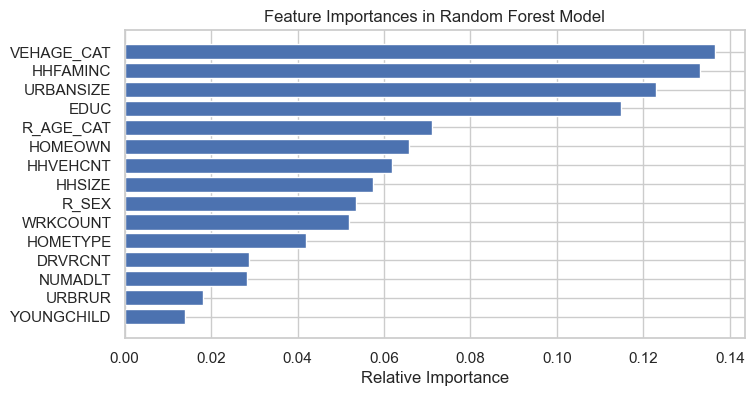

In [144]:
feature_importances = rf_best_model.feature_importances_

features = X_train.columns

indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(8, 4))
plt.title('Feature Importances in Random Forest Model')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis()
plt.show()

### Key Insights from Feature Importance

The graph showcases the feature importances derived from the Random Forest model, providing insights into which variables significantly influence the model's predictions.

#### Most Influential Features:
1. **VEHAGE_CAT (Vehicle Age Category)**: 
The age of a vehicle is the most critical factor in predicting the outcome. This indicates that the lifecycle stage of a vehicle, whether it's new, moderately new, old, or very old, significantly impacts its usage patterns and perhaps its likelihood of being a traditional or alternative fuel vehicle.

2. **HHFAMINC (Household Family Income)**: 
Household income is a vital predictor, reflecting economic capability as a significant determinant in vehicle choice, likely influencing the ability to afford newer or alternative fuel vehicles.

3. **URBANSIZE (Urbanization Size)**: 
The size of the urban area where the respondent lives is crucial. Larger urban areas might have different transportation needs and preferences compared to smaller towns or rural areas.

4. **EDUC (Education Level)**: 
Higher education levels correlate with specific vehicle preferences, possibly due to increased awareness of environmental issues or economic ability.

5. **R_AGE_CAT (Respondent Age Category)**: 
Different age groups exhibit distinct vehicle preferences and usage patterns.

#### Less Influential Features:
- **URBRUR (Urban vs. Rural)** and **YOUNGCHILD (Presence of Young Children)**: These factors are less significant but still contribute to the model's predictions. They might reflect specific demographic or lifestyle preferences that are secondary to the more dominant factors like vehicle age and household income.

This analysis highlights the multi-faceted nature of vehicle ownership and usage patterns. Economic, demographic, and regional factors collectively shape vehicle preferences.

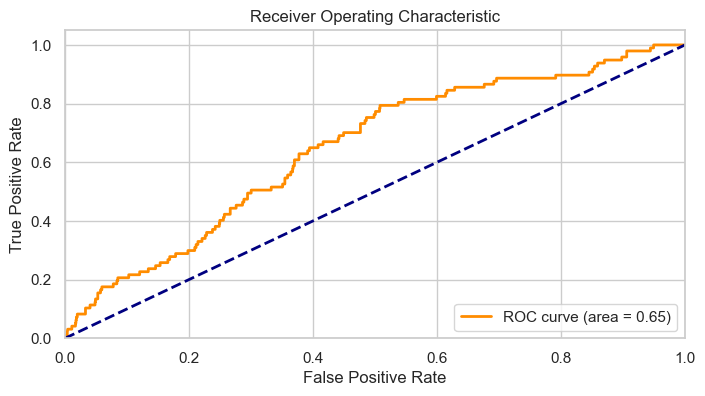

In [145]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Obtain probabilities for the positive class
y_prob = rf_best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
